# 1. The dataset : IMDB (Internet Movie Database)

### References:
- Maas, A., Daly, R., Pham, P., Huang, D., Ng, A., & Potts, C. (2011). [Learning Word Vectors for Sentiment Analysis.](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)
- [IMDB movie review sentiment classification dataset](https://keras.io/api/datasets/imdb/)

This is a dataset of 50,000(25,000 for training) IMDB reviews. Each review comes with a label. 
- A `label of 0` is given to a `negative review`
- A `label of 1` is given to a `positive review`

The goal is to create a model that will predict the sentiment of a review, based on the words in the review.

Moview reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset

In [125]:
# Loading the data
from keras.datasets import imdb

In [126]:
# Dictionary of all preprocessed words
word_index = imdb.get_word_index()

# Sorted by the most common frequency in the dataset
preview_words = sorted(word_index.items(), key=lambda item:item[1])

print("first 10 words before encode and filtering :")
for word in preview_words[:10]:
    print(word)
print("number of words:", len(word_index))

first 10 words before encode and filtering :
('the', 1)
('and', 2)
('a', 3)
('of', 4)
('to', 5)
('is', 6)
('br', 7)
('in', 8)
('it', 9)
('i', 10)
number of words: 88584


# 2. Loading the data

This dataset comes preloaded with Keras, so one simple command will get us training and testing data, also we can change the default arguments to make filtering operations:
- `num_words`: (integer or None),Words are ranked by how often they occur (in the training set) and only the `num_words` most frequent words are kept. Any less frequent word will appear as `oov_char` value in the sequence data. If None, all words are kept (88584 words). Defaults to `None`.
- `start_char`: (integer). The start of a sequence will be marked with this character.Defaults to 1.
- `skip_top`: skip the top N most frequently occurring words (which may not be informative). These words will appear as `oov_char` value in the dataset. When 0, no words are skipped. Defaults to 0.
- `oov_char`: (integer). The out-of-vocabulary character. Words that were cut out because of the `num_words` or `skip_top` limits will be replaced with this character.

In [3]:
# load the train and test data with all the words
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [4]:
# load the train and test data filtering the words
(x_train_filter, y_train_filter),\
(x_test_filter, y_test_filter) = imdb.load_data(num_words=5000,
                                                      skip_top=30,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3,
                                                     )

In [5]:
print("x train shape:",x_train_filter.shape)
print("y train shape:",y_train_filter.shape)

x train shape: (25000,)
y train shape: (25000,)


After loading and splitting the data each movie review is encoded using the default arguments (showing all words in `word_index`) or using modified arguments (filtering words)

Modify the arguments can help us to improve the model by skipping words that may not be informative in the classification process.

### NOTE

**The encoded values aren't the same values that were shown in the `word_index` dictionary. For instance, values 1,2,3 by default are reserved and the encoded values now start with number 4 if arguments are set with default values. For example:**
- `'the'` is encoded with value 4
- `'and'` is encoded with value 5
- `'a'` is encoded with value 6, and so on

**if arguments are modified like `num_words` or `skip_top`, the words out of the new range are encoded as `oov_char` in this case value 2**

In [6]:
def decode_review(data_list):
    # Default parameters used when load the data
    start_char = 1
    oov_char = 2
    index_from = 3
    # Retrieve the word index file mapping words to indices
    word_index = imdb.get_word_index()
    # Reverse the word index to obtain a dict mapping indices to words
    # And add `index_from` to indices to sync with `x_train`
    inverted_word_index = dict(
        (i + index_from, word) for (word, i) in word_index.items()
    )
    # Update `inverted_word_index` to include `start_char` and `oov_char`
    inverted_word_index[start_char] = "[START]"
    inverted_word_index[oov_char] = "[OOV]"
    # Decode the first sequence in the dataset
    decoded_sequence = " ".join(inverted_word_index[i] for i in data_list)
    return decoded_sequence


In [7]:
# firts movie review with default arguments
print("encode movie review:\n",x_train[0],'\n')
print("review label:",'positive' if y_train[0]==1 else 'negative','\n')
print("decode movie review:\n",decode_review(x_train[0]))

encode movie review:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

review label

In [8]:
# firts movie review filtering the words
print("encode movie review with filtered words:\n",x_train_filter[0],'\n')
print("review label:",'positive' if y_train[0]==1 else 'negative','\n')
print("decode movie review with filtered words:\n",decode_review(x_train_filter[0]))

encode movie review with filtered words:
 [2, 2, 2, 2, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 2, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 4536, 1111, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 33, 2, 130, 2, 2, 38, 619, 2, 2, 124, 51, 36, 135, 48, 2, 1415, 33, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 2, 400, 317, 46, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 30, 2, 2, 51, 36, 2, 224, 92, 2, 104, 2, 226, 65, 2, 38, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 32, 2, 2, 2, 2, 178, 32] 

review label: positive 

decode movie review with filtered words:
 [OOV] [OOV] [OO

# 3.Vectorization

### References:

- [Why One-Hot Encode Data in Machine Learning?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

- [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

- [Vectorize a text](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

By now I selected `5000` words from the `word_index` to codify every movie review into integer values. The problem is every movie review is different: 
- No one movie review uses all the 5000 words.
- Repeated words in a single movie review
- The array length of every movie review is different
- Every movie review has a different "bag of words" to compose a review.

To solve this problem I `vectorized` every encoded movie review into a `vector of length 5000` where the coefficient for each encoded word(`token`) changes by a binary representation(0 or 1), based on the word count.

For example the pre-processed vector (`x_train_filter[0]`) contains the number `2` and `43`, then in the processed vector(`x_train_token[0]`), the `index 2` and the `index 43` will be `1`

I also used `one-hot` encoding in the output because we have `2` posible options(negative or positive moview review)

<img src='images/vectorization.png' width='50%'>

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

# vectorize data into vector mode, each of length 5000
tokenizer = Tokenizer(num_words=5000)
x_train_token = tokenizer.sequences_to_matrix(x_train_filter, mode='binary')
x_test_token = tokenizer.sequences_to_matrix(x_test_filter, mode='binary')


# One-hot encoding the output
num_classes = 2
y_train_token = to_categorical(y_train_filter, num_classes)
y_test_token = to_categorical(y_test_filter, num_classes)

In [10]:
# length
print("length of a single vectorized movie review:\n",len(x_train_token[0]))
# encoded representation
print("first 10 encoded words of a movie review:\n", x_train_filter[0][:10])
# vectorized representation
print("first 10 vectorized words of a movie review:\n", x_train_token[0][:10])

#
print('original label(negative:0, positive:1):\n',y_train_filter[0])
print('one-hot encoding label:\n',y_train_token[0])

length of a single vectorized movie review:
 5000
first 10 encoded words of a movie review:
 [2, 2, 2, 2, 43, 530, 973, 1622, 1385, 65]
first 10 vectorized words of a movie review:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
original label(negative:0, positive:1):
 1
one-hot encoding label:
 [0. 1.]


# 4.Building the model architecture

### References:
- [Sequential model](https://keras.io/guides/sequential_model/)
- [Keras Dense Layer: How to Use It Correctly](https://wandb.ai/ayush-thakur/keras-dense/reports/Keras-Dense-Layer-How-to-Use-It-Correctly--Vmlldzo0MjAzNDY1)

In [11]:
# to use CPU/GPU in training process
import tensorflow as tf

# Neural networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


# IMPORTANT: keras.wrappers.scikit_learn is deprecated. 
# By now I will used anyway and I'm gonna hide the warning error
# --------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# --------------------------------------------------------------

### Optimal number of 'units'

- [Dropout Regularization in Deep Learning Models with Keras](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
- [Dropout layer](https://keras.io/api/layers/regularization_layers/dropout/)

How properly select the number of `units` in a `dense layer`? This first step can significantly impact the model's performance. Some solutions that I found:
- `Trial and error` (not a good choice)
- `Rule of Thumb`: Use a number of `units` between the number of input features and the number of output classes.
- `Grid search`: search over a range of possible values and return an optimal configuration

By now I created a simple `Sequential` model with a hidden layer and unknown `units`, a `Relu` activation function (popular choice), and a `softmax` activation function for the output (is often used as the activation for the last layer of a classification network)

<img src='images/units.png' width='40%'>

In [12]:
def IMDB_first_model (units=1):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(5000,)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
# shows the training process if true
#tf.debugging.set_log_device_placement(False)

# to use only CPU in training process
with tf.device('/CPU:0'):
    #create a wrapper for use in GridSearchCV with KerasClassifier API
    first_estimator = KerasClassifier(build_fn=IMDB_first_model, verbose=0)
    #defined parameters for grid search
    #first_param_grid = {'units':[250,400,650,800,850]} # best option: 800, best score: 0.8826
    #first_param_grid = {'units':[800,825,850,900,1200]} # best option: 1200, best score: 0.8820
    first_param_grid = {'units':[400,800,1200,2000]} #best option: 400, best score:0.8828
    #perform grid search
    first_grid = GridSearchCV(estimator=first_estimator,param_grid=first_param_grid)
    first_grid_result = first_grid.fit(x_train_token, y_train_token)

In [25]:
#show result
print("Best score: %f using %s" % (first_grid_result.best_score_, first_grid_result.best_params_))
means = first_grid_result.cv_results_['mean_test_score']
stds = first_grid_result.cv_results_['std_test_score']
params = first_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f (stdev: %f) with: %r" % (mean, stdev, param))

Best score: 0.882840 using {'units': 400}
mean: 0.882840 (stdev: 0.002541) with: {'units': 400}
mean: 0.882800 (stdev: 0.000580) with: {'units': 800}
mean: 0.880440 (stdev: 0.002480) with: {'units': 1200}
mean: 0.882680 (stdev: 0.004372) with: {'units': 2000}


### Dropout

`Dropout` is a regularization technique used to prevent overfitting in neural networks. Dropout helps to prevent `overfitting` randomly setting a fraction of input `units` to zero during training, effectively "dropping out" some neurons.

<img src='images/dropout.png' width='40%'>

In [26]:
def IMDB_second_model (dropout=0):
    model = Sequential()
    model.add(Dense(400, activation='relu', input_shape=(5000,)))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
# to use only CPU in training process
with tf.device('/CPU:0'):
    #create a wrapper for use in GridSearchCV with KerasClassifier API
    second_estimator = KerasClassifier(build_fn=IMDB_second_model, verbose=0)
    #defined parameters for grid search
    second_param_grid = {'dropout':[0,0.1,0.2,0.4,0.5,0.6]} # best score:0.8841 using dropout:0.5
    #perform grid search
    second_grid = GridSearchCV(estimator=second_estimator,param_grid=second_param_grid)
    second_grid_result = second_grid.fit(x_train_token, y_train_token)

In [35]:
#show result
print("Best score: %f using %s" % (second_grid_result.best_score_, second_grid_result.best_params_))

Best score: 0.884160 using {'dropout': 0.5}


### A second hidden layer?

For simpler problems adding unnecessary complexity (additional hidden layers) might lead to overfitting or slower convergence without significant benefits. Deeper architectures require more computational resources for training and inference. If computational resources are limited, simpler models may be preferred.

In [52]:
def IMDB_third_model (units=1):
    model = Sequential()
    model.add(Dense(400, activation='relu', input_shape=(5000,)))
    model.add(Dropout(0.5))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

`EarlyStopping` prevent overfitting. Combining with `GridSearchCV` can stop training for each parameter combination as soon as it becomes clear that further training is not improving the model's performance, saving computational resources and time.

In [28]:
# prevent overfitting 
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor="val_loss",
                                patience=3, #number of epochs with no improvement before stopping
                                verbose=0)

In [ ]:
# to use only CPU in training process
with tf.device('/CPU:0'):
    #create a wrapper for use in GridSearchCV with KerasClassifier API
    third_estimator = KerasClassifier(build_fn=IMDB_third_model, verbose=0)
    #defined parameters for grid search
    third_param_grid = {'units':[100,150,200,250]} #best score:0.882280 units:200
    #perform grid search
    third_grid = GridSearchCV(estimator=third_estimator,param_grid=third_param_grid)
    third_grid_result = third_grid.fit(x_train_token, y_train_token,\
                                       validation_data=(x_test_token, y_test_token),\
                                       callbacks=[earlystopping])

In [52]:
#Shows result
print("Best score: %f using %s" % (third_grid_result.best_score_, third_grid_result.best_params_))

Best score: 0.882280 using {'units': 200}


In [53]:
#Model comparison
#dropout model
dropout_model = IMDB_second_model(dropout=0.5)
hist_dropout_model=dropout_model.fit(x_train_token, y_train_token, verbose=0)
#second hidden layer model
second_units_model = IMDB_third_model(units=200)
hist_units_model=second_units_model.fit(x_train_token, y_train_token, verbose=0)

In [54]:
# Evaluating the model on testing data set
score_dropout_model = dropout_model.evaluate(x_test_token, y_test_token)
print("\n Testing Accuracy with dropout model:", score_dropout_model[1])
score_units_model = second_units_model.evaluate(x_test_token, y_test_token)
print("\n Testing Accuracy with second hidden layer:", score_units_model[1])

782/782 [==============================] - 1s 2ms/step - loss: 0.2841 - accuracy: 0.8806

 testing Accuracy with dropout model: 0.8805999755859375
782/782 [==============================] - 2s 2ms/step - loss: 0.2843 - accuracy: 0.8816

 Testing Accuracy with second hidden layer: 0.881600022315979


The difference in accuracy between the 2 models is minimal and the second model (the one with a second hidden layer) is slower, in this case, I decided to NOT add a second hidden layer.

### Optimal batch size and epochs

- [All You Need to Know about Batch Size, Epochs and Training Steps in a Neural Network](https://medium.com/data-science-365/all-you-need-to-know-about-batch-size-epochs-and-training-steps-in-a-neural-network-f592e12cdb0a).
- [Difference Between a Batch and an Epoch in a Neural Network](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)
- [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

 - The `batch size` affects the convergence speed and generalization performance of the model. The value is typically chosen between 1 and a few hundreds. In `keras` the default values is `32`(in general across a wide range of experiments. In all cases the best results have been obtained with batch sizes iqual to 32)
 
- The number of `epochs` allows the learning algorithm to run until the error from the model has been sufficiently minimized.

There are no magic rules for how to configure these parameters. You must try different values and see what works best for your problem.

In [59]:
def IMDB_model ():
    model = Sequential()
    model.add(Dense(400, activation='relu', input_shape=(5000,)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
# prevent overfitting 
earlystopping = EarlyStopping(monitor="val_loss", patience=3, mode="min",restore_best_weights=True)

# to use only CPU in training process
with tf.device('/CPU:0'):
    #create a wrapper for use in GridSearchCV with KerasClassifier API
    estimator = KerasClassifier(build_fn=IMDB_model,verbose=0)
    #defined parameters for grid search
    #param_grid = {'batch_size':[3,5,10,12,20,25,30,40]} # best score 0.8821, batch_size:20
    param_grid = {'batch_size':[15,20,22,26,30]} # best score 0.8827, batch_size:22
    #perform grid search
    grid = GridSearchCV(estimator=estimator,param_grid=param_grid)
    grid_result = grid.fit(x_train_token, y_train_token,\
                            validation_data=(x_test_token, y_test_token),\
                            callbacks=[earlystopping], verbose=0)

In [19]:
#Shows result
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.882800 using {'batch_size': 30}


In [48]:
model_epochs = IMDB_model()

# verify overfitting 
earlystopping = EarlyStopping(monitor="val_loss", patience=3, mode="min",restore_best_weights=True,verbose=1)

# epochs verification
history = model_epochs.fit(x_train_token, y_train_token, 
                    batch_size=22,
                    epochs=12, #random value
                    validation_data=(x_test_token, y_test_token),
                    callbacks=[earlystopping])

Epoch 1/12
1137/1137 [==============================] - 6s 5ms/step - loss: 0.3446 - accuracy: 0.8537 - val_loss: 0.2916 - val_accuracy: 0.8796
Epoch 2/12
1137/1137 [==============================] - 5s 4ms/step - loss: 0.2180 - accuracy: 0.9146 - val_loss: 0.2978 - val_accuracy: 0.8784
Epoch 3/12
1137/1137 [==============================] - 5s 4ms/step - loss: 0.1312 - accuracy: 0.9514 - val_loss: 0.4046 - val_accuracy: 0.8678
Epoch 4/12
1137/1137 [==============================] - 5s 4ms/step - loss: 0.0706 - accuracy: 0.9754 - val_loss: 0.4487 - val_accuracy: 0.8714
Epoch 4: early stopping


### Making predictions

<img src='images/neuralNetwork.png' width='40%'>

In [60]:
model = IMDB_model()
model.summary()

with tf.device('/CPU:0'):
    # training the model
    history = model.fit(x_train_token, y_train_token, 
                    batch_size=22,
                    epochs=1,
                    validation_data=(x_test_token, y_test_token),
                    verbose=2)
    # Evaluating the model on the training and testing set
    score_train = model.evaluate(x_train_token, y_train_token)
    score_test = model.evaluate(x_test_token, y_test_token)
    
print("\n Training Accuracy:", score_train[1])
print("\n Testing Accuracy:", score_test[1])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 400)               2000400   
                                                                 
 dropout_15 (Dropout)        (None, 400)               0         
                                                                 
 dense_51 (Dense)            (None, 2)                 802       
                                                                 
Total params: 2,001,202
Trainable params: 2,001,202
Non-trainable params: 0
_________________________________________________________________
1137/1137 - 10s - loss: 0.3352 - accuracy: 0.8558 - val_loss: 0.2815 - val_accuracy: 0.8826 - 10s/epoch - 9ms/step
782/782 [==============================] - 2s 3ms/step - loss: 0.2815 - accuracy: 0.8826

 Training Accuracy: 0.9397600293159485

 Testing Accuracy: 0.8825600147247314


In [102]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(x_test_token)

782/782 [==============================] - 1s 1ms/step


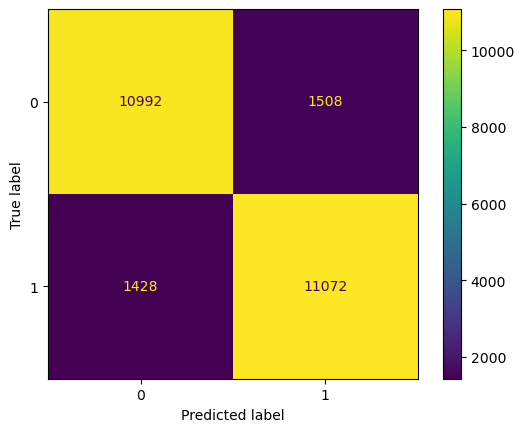

In [62]:
# prediction to binary
threshold = 0.5
pred_binary = np.where(predictions[:,1]>=threshold,1,0)
# labeled test data to binary
y_test_binary = np.where(y_test_token[:,1]==1,1,0)

cm = confusion_matrix(y_test_binary, pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

From the confusion matrix we can conclude:
- `10992` positive movie reviews were correctly predicted
- `11072` negative movie reviews were correctly predicted as negative
- `1508` incorrectly classified movie reviews as positives
- `1428` incorrectly classified movie reviews as negatives

from a total value `25000(100%)` movie reviews, `2936(11.9%)` are incorrecly classified. 

### Misclassified moview reviews

In [180]:
for y_index in range(0,len(pred_binary)):
    # shows the first misclassification
    if (y_test_binary[y_index] != pred_binary[y_index]):
        print("predicted review label:",'positive' if pred_binary[y_index]==1 else 'negative','\n')
        print("decoded movie review:\n",decode_review(x_test[y_index]))
        break

predicted review label: positive 

decoded movie review:
 [START] i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are impossibly involved with the actions on the screen so then why the hell can't we have night vision


### Feature importance

# 5. Improvements

1. Filter words properly:
    - Use `natural language processing (NLP)` or another technique to remove `stopwords ('the,'a','an',...)`, `names('Jhon','Sofia',...)`, `places('Montana','France'...)` from the entire database.
    - Filtering dates ('1992',...) or another number.


2. Words dictinary: 
    - Use all the words in the dictionary
3. Feature importance:
    - Analyze the importance of features (words in this case) in predicting sentiment. Features with low importance may be considered less relevant for sentiment analysis.

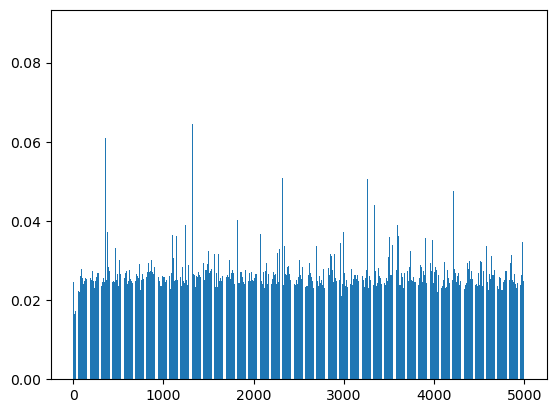

In [174]:
# Get the weights of the input layer
input_layer_weights = model.layers[0].get_weights()

# Calculate the feature importance scores based on the weights
feature_importance = np.mean(np.abs(input_layer_weights[0]), axis=1)
array_num = list(range(0,len(feature_importance)))

matplotlib.pyplot.bar(array_num[:],feature_importance[:])
plt.show()

In [172]:
# select words with a score higher than 0.04 
sentiment_index = []
for index,value in enumerate(list(feature_importance)):
    if value >0.04:
        sentiment_index.append(index)

sentiment_words = []
for index in sentiment_index:
    sentiment_words.append(preview_words[index])
print('number of words with a score higher than 0.04:',len(sentiment_words))
print('first 5 words:',sentiment_words[:5])

number of words with a score higher than 0.04: 122
first 5 words: [('also', 79), ('most', 88), ('did', 119), ('look', 165), ('fun', 250)]
